In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('../datasets/word2vec/embedding/wikipedia_color_names.csv')

In [3]:
data.head()

,Name,Hex (24 bit),Red (8 bit),Green (8 bit),Blue (8 bit),Hue (degrees),HSL.S (%),"HSL.L (%), HSV.S (%), HSV.V (%)"
0,Absolute zero,#0048BA,0,72,186,217.0,100.0,37.0
1,Acid green,#B0BF1A,176,191,26,65.0,76.0,43.0
2,Aero,#7CB9E8,124,185,232,206.0,70.0,70.0
3,Aero blue,#C9FFE5,201,255,229,151.0,100.0,89.0
4,African violet,#B284BE,178,132,190,288.0,31.0,63.0


In [4]:
mod = data.iloc[:,[0,2,3,4]]

In [5]:
mod

,Name,Red (8 bit),Green (8 bit),Blue (8 bit)
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
1293,Yellow rose,255,240,0
1294,Yellow Sunshine,255,247,0
1295,Zaffre,0,20,168
1296,Zinnwaldite brown,44,22,8


In [6]:
X,y = mod.iloc[:,1:].values,mod.iloc[:,0].values

In [7]:
X

array([[  0,  72, 186],
       [176, 191,  26],
       [124, 185, 232],
       ...,
       [  0,  20, 168],
       [ 44,  22,   8],
       [ 57, 167, 142]])

In [8]:
y

array(['Absolute zero', 'Acid green', 'Aero', ..., 'Zaffre',
       'Zinnwaldite brown', 'Zomp'], dtype=object)

In [10]:
(y== "Red").sum()

1

In [11]:
X[y=="Red"]

array([[255,   0,   0]])

In [12]:
X[y=="Blue"]

array([[  0,   0, 255]])

In [14]:
X[y=="Green"]

array([], shape=(0, 3), dtype=int64)

In [15]:
color = X[y=="Red"]

In [19]:
X

array([[  0,  72, 186],
       [176, 191,  26],
       [124, 185, 232],
       ...,
       [  0,  20, 168],
       [ 44,  22,   8],
       [ 57, 167, 142]])

In [20]:
color

array([[255,   0,   0]])

In [17]:
X-color

array([[-255,   72,  186],
       [ -79,  191,   26],
       [-131,  185,  232],
       ...,
       [-255,   20,  168],
       [-211,   22,    8],
       [-198,  167,  142]])

In [21]:
distances = np.sqrt(np.sum(((X-color) ** 2),axis = 1))

In [24]:
distances.shape

(1298,)

In [29]:
distances

array([323.73600356, 208.32186635, 324.3609101 , ..., 306.02124109,
       212.29460662, 295.39295862])

In [25]:
near = distances.argsort()[:10]

In [26]:
near

array([ 968,  177,  586, 1251, 1055, 1024,  425,  974, 1012,  166])

In [28]:
y[near]

array(['Red', 'Candy apple red', 'KU Crimson', 'Vivid red', 'Scarlet',
       'Ruddy', 'Ferrari Red', 'Red (RYB)', 'Rosso corsa', 'Cadmium red'],
      dtype=object)

In [30]:
colors_rgb = X[near]

In [31]:
colors_rgb.shape

(10, 3)

In [32]:
colors_rgb.reshape(1,-1,3).shape

(1, 10, 3)

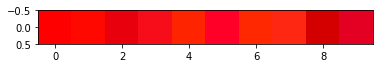

In [33]:
plt.imshow(colors_rgb.reshape(1,-1,3))

In [64]:
c1,c2,c3 = "Burnt orange","Black","Pink"

In [65]:
y[y=="Black"]

array(['Black'], dtype=object)

In [66]:
relation = X[y==c1] - X[y==c2]

In [67]:
relation

array([[204,  85,   0]])

In [68]:
output = X[y==c3] - relation

In [69]:
output

array([[ 51, 107, 203]])

In [70]:
def near_colors(color):
    distances = np.sqrt(np.sum(((X-color) ** 2),axis = 1))
    near = distances.argsort()[:10]
    return y[near],X[near]

In [71]:
y_col,X_col = near_colors(output)

([<matplotlib.axis.YTick at 0x7f799187b290>,
 [Text(0, 0, 'Han blue'),
  Text(0, 0, 'Royal blue'),
  Text(0, 0, 'Bright navy blue'),
  Text(0, 0, 'Cerulean blue'),
  Text(0, 0, 'Cyan-blue azure'),
  Text(0, 0, 'New Car'),
  Text(0, 0, 'Denim'),
  Text(0, 0, 'Steel blue'),
  Text(0, 0, 'Tufts Blue'),
  Text(0, 0, 'Violet-blue')])

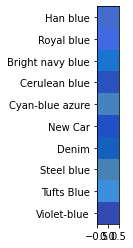

In [72]:
plt.imshow(X_col.reshape(-1,1,3))
plt.yticks(range(10),y_col)